In [4]:
from PIL import Image
from tqdm import tqdm_notebook as tqdm
from pathlib import Path
import imagehash
import pickle

In [3]:
data_path = Path("data")
movies_path = data_path / "movie_posters_filtered.pkl"

In [5]:
with movies_path.open("rb") as f:
    movies = pickle.load(f)

In [7]:
en_movies = movies[movies["iso_639_1"] == "en"]

In [65]:
en_movies = en_movies.sort_values("movie")

In [67]:
hashes = []
for m, posters in tqdm(en_movies.groupby("movie")):
    for _, p in posters.iterrows():
        poster_path = data_path/f'posters/{m}/{p["file_path"]}'
        img = Image.open(poster_path)
        hashes.append(imagehash.dhash(img))

/storage/homedir/dima/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [201]:
!ls data/movies | wc -l

9986


In [68]:
en_movies["dhash"] = hashes

In [25]:
en_movies.iloc[0]["dhash"] - en_movies.iloc[1]["dhash"]

34

In [26]:
from scipy.spatial.distance import cdist

In [36]:
import numpy as np

In [39]:
 cdist([en_movies.iloc[0]["dhash"].hash.flatten()], [en_movies.iloc[1]["dhash"].hash.flatten()], lambda u, v: np.count_nonzero(v != u))

array([[34.]])

In [186]:
en_movies["dups"]= False

In [199]:
for m, posters in tqdm(en_movies.groupby("movie")):
    
    dhash = [p.hash.flatten() for p in posters["dhash"]]
    dist = cdist(dhash, dhash, lambda u, v: np.count_nonzero(v != u))
    sim = np.where(dist<16)
    s1 = sim[0][sim[0]!=sim[1]]
    s2 = sim[1][sim[0]!=sim[1]]
    dups = get_duplicates(s1, s2)
    en_movies.loc[posters.iloc[dups].index,'dups'] = True

/storage/homedir/dima/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [198]:
en_movies.loc[posters.iloc[dups].index,'dups']

13277    False
Name: dups, dtype: bool

In [200]:
en_movies

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,file_path,height,iso_639_1,movie,vote_average,vote_count,width,dhash,dups,20
29589,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,...,/g7hWnjMdqTYYI78yeCD3moObbRK.jpg,1063.0,en,#Alive,0.000,0.0,750.0,60f034afee66cccd,False,NaN
29591,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,...,/6J01nS70QMQ9iqR1qxXVdRJneDJ.jpg,2149.0,en,#Alive,0.000,0.0,1500.0,2cc8e84c46d60fa9,False,NaN
29588,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,...,/sn1QfOCUikJFE0eUED5Ha5ngU6v.jpg,1500.0,en,#Alive,0.000,0.0,1000.0,e0f060a0e869e2f2,False,NaN
29587,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,...,/28zCpUo1cH3n7xMLdfGc0UCvqb7.jpg,1500.0,en,#Alive,0.000,0.0,1000.0,e0f064a8e868f2e2,True,True
29586,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,...,/qSAwS1U4erAVaCGKj3aAxhqy10k.jpg,2005.0,en,#Alive,5.246,2.0,1336.0,e0f060a0e868e0c0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13275,tt0081809,6.3,4613,movie,ffolkes,North Sea Hijack,0,1980.0,NaN,100.0,...,/syoqatXjRPLT6B5I5A6HmmxZtUD.jpg,1500.0,en,ffolkes,5.190,5.0,1000.0,12396d4e9ccccee8,False,NaN
13277,tt0081809,6.3,4613,movie,ffolkes,North Sea Hijack,0,1980.0,NaN,100.0,...,/2BfvvgtMrM9QvnliAw4OS8kjA7w.jpg,1500.0,en,ffolkes,5.180,3.0,1000.0,8ebe6d4f9e8c4f6c,True,True
13278,tt0081809,6.3,4613,movie,ffolkes,North Sea Hijack,0,1980.0,NaN,100.0,...,/v7YvYI95fGgadM1Vsz15UbscI9g.jpg,3000.0,en,ffolkes,5.128,6.0,2000.0,ec9f9ea40c1721ed,False,NaN
13276,tt0081809,6.3,4613,movie,ffolkes,North Sea Hijack,0,1980.0,NaN,100.0,...,/1ULRejeAqzSTHLsPtx58Fe8H5ad.jpg,1500.0,en,ffolkes,5.180,3.0,1000.0,6c4e0e8d0b071f4d,False,NaN


In [184]:
posters

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,aspect_ratio,file_path,height,iso_639_1,movie,vote_average,vote_count,width,dhash
29589,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,"[Action, Drama, Horror]",0.705550,/g7hWnjMdqTYYI78yeCD3moObbRK.jpg,1063.0,en,#Alive,0.000,0.0,750.0,60f034afee66cccd
29591,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,"[Action, Drama, Horror]",0.697999,/6J01nS70QMQ9iqR1qxXVdRJneDJ.jpg,2149.0,en,#Alive,0.000,0.0,1500.0,2cc8e84c46d60fa9
29588,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,"[Action, Drama, Horror]",0.666667,/sn1QfOCUikJFE0eUED5Ha5ngU6v.jpg,1500.0,en,#Alive,0.000,0.0,1000.0,e0f060a0e869e2f2
29587,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,"[Action, Drama, Horror]",0.666667,/28zCpUo1cH3n7xMLdfGc0UCvqb7.jpg,1500.0,en,#Alive,0.000,0.0,1000.0,e0f064a8e868f2e2
29586,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,"[Action, Drama, Horror]",0.666334,/qSAwS1U4erAVaCGKj3aAxhqy10k.jpg,2005.0,en,#Alive,5.246,2.0,1336.0,e0f060a0e868e0c0
29585,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,"[Action, Drama, Horror]",0.666500,/sLaiOg2Y5SsBo0lIXXan1Q3xlZs.jpg,2000.0,en,#Alive,5.312,1.0,1333.0,2cccec6c4796562e
29584,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,"[Action, Drama, Horror]",0.666334,/zqf711LsnQ5CcW3rISFw2t7OYzb.jpg,2005.0,en,#Alive,5.454,3.0,1336.0,e0f060a0ea68f2e2
29590,tt10620868,6.2,19652,movie,#Alive,#Saraitda,0,2020.0,NaN,98.0,"[Action, Drama, Horror]",0.666334,/i0i8BligrPLwsCxkQsYvJCR8CSV.jpg,2005.0,en,#Alive,0.000,0.0,1336.0,e0f060a0ea68f2e2


In [54]:
en_movies = en_movies.reset_index(drop=True)

In [70]:
posters.iloc[0]["dhash"] - posters.iloc[1]["dhash"]

29

In [59]:
hashes[29584] - hashes[29585]

0

In [121]:
imagehash.crop_resistant_hash(Image.open(data_path/f'posters/{m}/{posters.iloc[0]["file_path"]}' )) - imagehash.crop_resistant_hash(Image.open(data_path/f'posters/{m}/{posters.iloc[5]["file_path"]}' ))

3

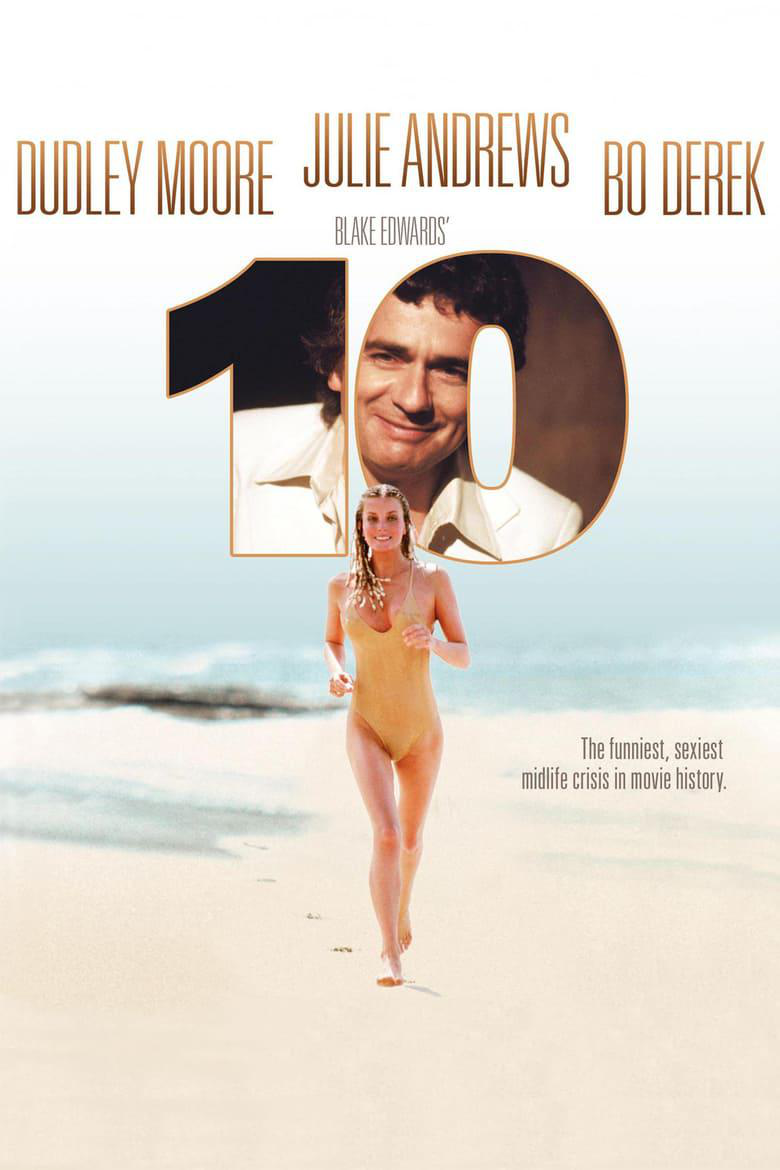

In [138]:
Image.open(data_path/f'posters/{m}/{posters.iloc[1]["file_path"]}' )

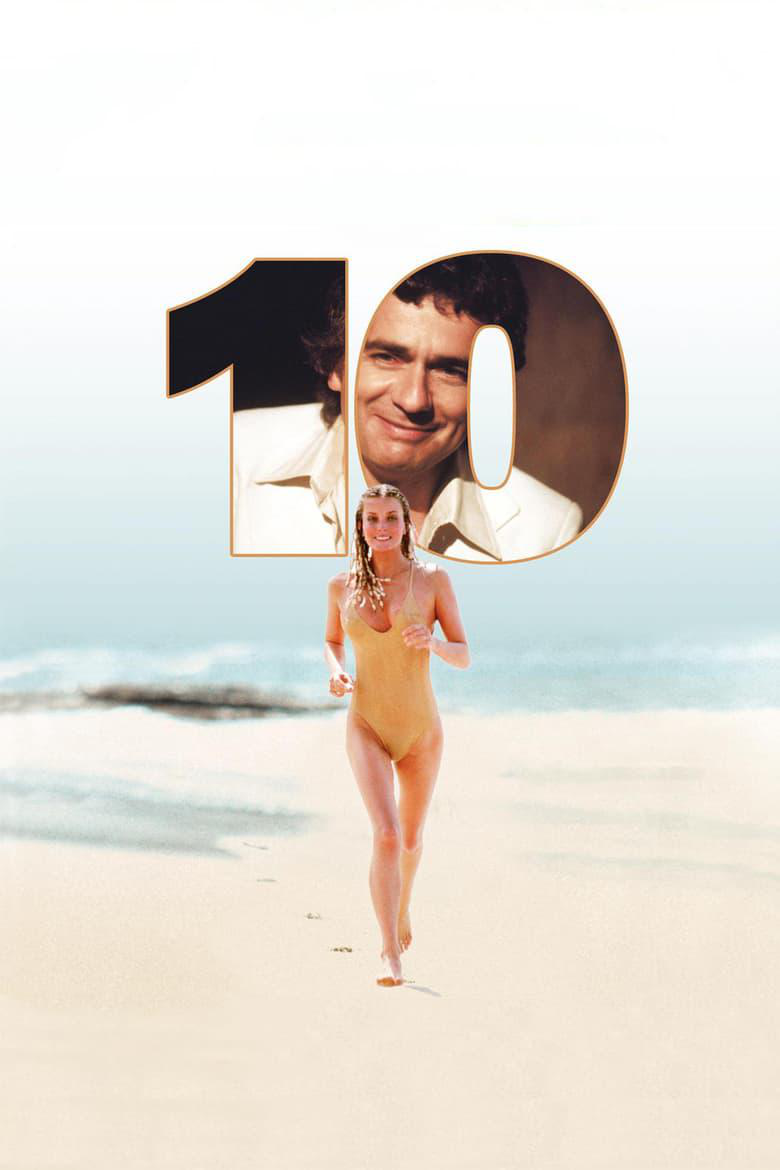

In [139]:
Image.open(data_path/f'posters/{m}/{posters.iloc[5]["file_path"]}' )

In [140]:
posters

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,aspect_ratio,file_path,height,iso_639_1,movie,vote_average,vote_count,width,dhash
12364,tt0078721,6.1,15046,movie,10,10,0,1979.0,NaN,122.0,"[Comedy, Romance]",0.666667,/9OM0HBJ6Sc2pnGVUrznGbjLfPdz.jpg,2100.0,en,10,5.180,3.0,1400.0,4d3a133333129213
12363,tt0078721,6.1,15046,movie,10,10,0,1979.0,NaN,122.0,"[Comedy, Romance]",0.666667,/jESuNdhILDzj3iwHEWUIwkn4EKn.jpg,2250.0,en,10,5.246,2.0,1500.0,4c1613cb2d296c70
12361,tt0078721,6.1,15046,movie,10,10,0,1979.0,NaN,122.0,"[Comedy, Romance]",0.666667,/uUCr4WTogPnb7LOILL8opxSyxGw.jpg,1500.0,en,10,5.318,3.0,1000.0,f091cce4f0e431b2
12362,tt0078721,6.1,15046,movie,10,10,0,1979.0,NaN,122.0,"[Comedy, Romance]",0.666500,/chUNxeISHzgXKKxDIuviqQ2zf3B.jpg,2000.0,en,10,5.246,2.0,1333.0,33330dcd4d6d6ccc
12360,tt0078721,6.1,15046,movie,10,10,0,1979.0,NaN,122.0,"[Comedy, Romance]",0.666667,/KMfGoJX0PKsmlOKmrBWkEPcLVC.jpg,1500.0,en,10,5.318,3.0,1000.0,92120c4d6d6d4c32
12359,tt0078721,6.1,15046,movie,10,10,0,1979.0,NaN,122.0,"[Comedy, Romance]",0.666667,/kC8cInADdO6eUe94d8rv3GTT0Ng.jpg,2250.0,en,10,5.318,3.0,1500.0,811613cb2d2d6870


In [142]:
dist = cdist(dhash, dhash, lambda u, v: np.count_nonzero(v != u))

In [156]:
dist<16

array([[ True, False, False, False, False, False, False, False],
       [False,  True, False, False, False,  True, False, False],
       [False, False,  True,  True,  True, False,  True,  True],
       [False, False,  True,  True,  True, False,  True,  True],
       [False, False,  True,  True,  True, False,  True,  True],
       [False,  True, False, False, False,  True, False, False],
       [False, False,  True,  True,  True, False,  True,  True],
       [False, False,  True,  True,  True, False,  True,  True]])

array([1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 6, 6, 6, 6, 7, 7, 7, 7])

array([5, 3, 4, 6, 7, 2, 4, 6, 7, 2, 3, 6, 7, 1, 2, 3, 4, 7, 2, 3, 4, 6])

In [146]:
sim

(array([0, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 6, 6,
        6, 6, 6, 7, 7, 7, 7, 7]),
 array([0, 1, 5, 2, 3, 4, 6, 7, 2, 3, 4, 6, 7, 2, 3, 4, 6, 7, 1, 5, 2, 3,
        4, 6, 7, 2, 3, 4, 6, 7]))

In [153]:
    s1 = sim[0][sim[0]!=sim[1]]
    s2 = sim[1][sim[0]!=sim[1]]

In [165]:
def get_duplicates(s1, s2):
    dup = set()
    not_dup = set()
    for i, j in zip(s1,s2):
        if i not in dup and j not in dup:
            if i in not_dup:
                dup.add(j)
            elif j in not_dup:
                dup.add(i)
            else:
                dup.add(j)
                not_dup.add(i)
        else:
            if i in not_dup:
                dup.add(j)
            if j in not_dup:
                dup.add(i)
    return list(dup)


In [164]:
get_duplicates(s1, s2)

({3, 4, 5, 6, 7}, {1, 2})

In [159]:
s1

array([1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 6, 6, 6, 6, 7, 7, 7, 7])

In [160]:
s2

array([5, 3, 4, 6, 7, 2, 4, 6, 7, 2, 3, 6, 7, 1, 2, 3, 4, 7, 2, 3, 4, 6])